In [57]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [58]:
df=pd.read_csv(r"C:\Users\kpasw\OneDrive\Desktop\Social_Network_Ads (2).csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,NaN,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,NaN,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [59]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,343.000000,366.000000,400.000000
mean,1.569154e+07,38.040816,70172.131148,0.357500
std,7.165832e+04,10.489681,33908.990029,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,30.000000,44000.000000,0.000000
50%,1.569434e+07,38.000000,71000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              343 non-null    float64
 3   EstimatedSalary  366 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [61]:
df.isna().sum()

User ID             0
Gender              0
Age                57
EstimatedSalary    34
Purchased           0
dtype: int64

<Axes: >

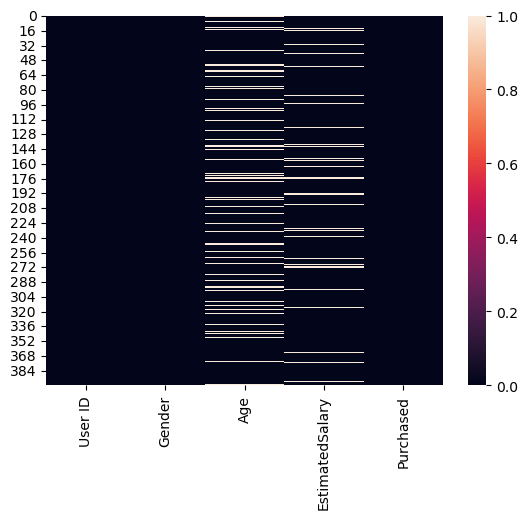

In [62]:
sns.heatmap(df.isna())

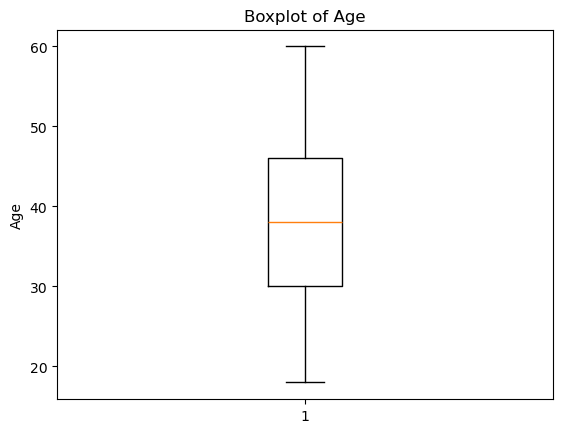

In [63]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(df["Age"].dropna())
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()


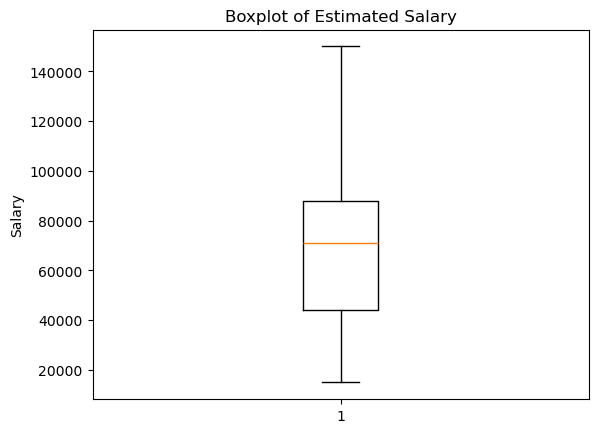

In [64]:
plt.figure()
plt.boxplot(df["EstimatedSalary"].dropna())
plt.title("Boxplot of Estimated Salary")
plt.ylabel("Salary")
plt.show()


In [65]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df["EstimatedSalary"].fillna(df["EstimatedSalary"].median(), inplace=True)

In [66]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

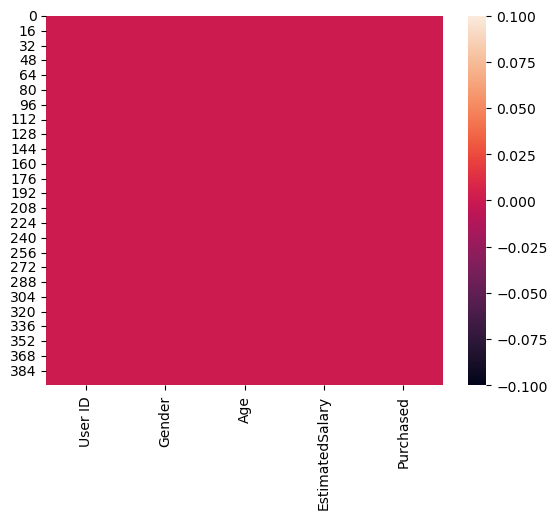

In [67]:
sns.heatmap(df.isna())

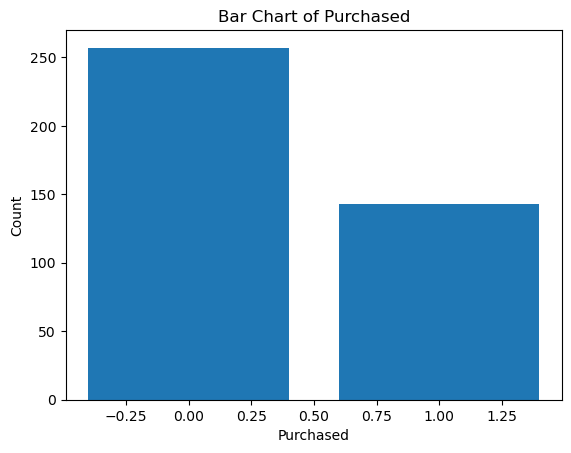

In [68]:
import matplotlib.pyplot as plt

counts = df["Purchased"].value_counts()

plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Bar Chart of Purchased")
plt.xlabel("Purchased")
plt.ylabel("Count")
plt.show()


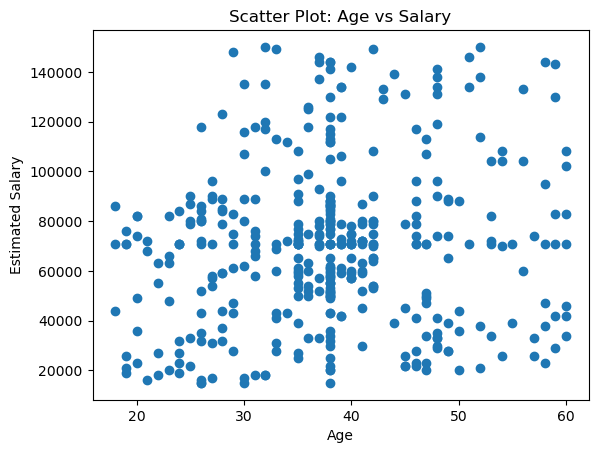

In [69]:
plt.figure()
plt.scatter(df["Age"], df["EstimatedSalary"])
plt.title("Scatter Plot: Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()


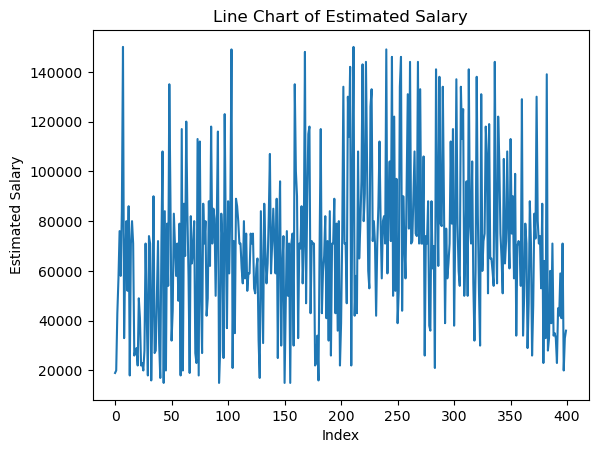

In [70]:
plt.figure()
plt.plot(df["EstimatedSalary"].values)
plt.title("Line Chart of Estimated Salary")
plt.xlabel("Index")
plt.ylabel("Estimated Salary")
plt.show()


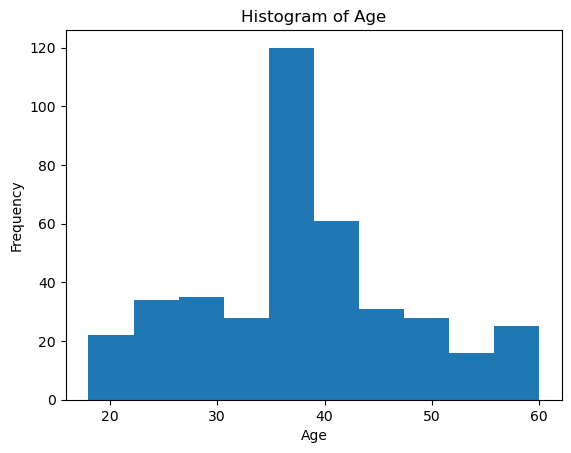

In [71]:
plt.figure()
plt.hist(df["Age"].dropna(), bins=10)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [73]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [74]:
x=df[['Gender','Age','EstimatedSalary']]
y=df[['Purchased']]

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [77]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [78]:
y_pred=model.predict(x_test)

In [79]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[50  2]
 [11 17]]


In [80]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8375
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        52
           1       0.89      0.61      0.72        28

    accuracy                           0.84        80
   macro avg       0.86      0.78      0.80        80
weighted avg       0.85      0.84      0.83        80



## Grid Search

In [81]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline



In [82]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [83]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])


In [84]:
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear']
}


In [85]:
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear']},
             scoring='accuracy')

In [86]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8125
[[48  3]
 [12 17]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        51
           1       0.85      0.59      0.69        29

    accuracy                           0.81        80
   macro avg       0.82      0.76      0.78        80
weighted avg       0.82      0.81      0.80        80

